<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
🚀 Spaceship Titanic Kaggle Competition Complete Guide
</p>
</div>

<center>
<img src="https://cdn.mos.cms.futurecdn.net/AKbyqTKUkicsYGx3xwe3HA.jpg" width=800 height=500 />
</center>

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Notebook- </b> Goal </h2>

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

💡 In this project we will do Binary Classification on Titanic Spaceship Dataset. (Kaggle Competition)<br>

💡 The objective of this project is to predict whether a person will be transported to an alternate dimension or not.<br>
</div>

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Notebook- </b> Content </h2>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

💡 Basic Understanding of Data.<br>

💡 Exploratory Data Analysis (EDA).<br>

💡 Feature Engineering.<br>

💡 Data Preprocessing.<br>

💡 Model Building.<br>

💡 Model Performance Check.<br>

💡 Model Hyper Parameter Tunning.<br>

💡 Predicting Test Data using best Model.<br>
</div>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Importing Libraries
</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Loading Datasets
</p>
</div>

In [5]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Data- </b> Description </h2>

> * **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.<br>
> * **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.<br>
> * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.<br>
> * **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.<br>
> * **Destination** - The planet the passenger will be debarking to.<br>
> * **Age** - The age of the passenger.<br>
> * **VIP** - Whether the passenger has paid for special VIP service during the voyage.<br>
> * **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br>
> * **Name** - The first and last names of the passenger.<br>
> * **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.<br>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Basic Understanding of Data
</p>
</div>

### 1.Checking Dimensions of Data

In [6]:
print("Training Dataset shape is: ",train_df.shape)
print("Testing Dataset shape is: ",test_df.shape)

Training Dataset shape is:  (8693, 14)
Testing Dataset shape is:  (4277, 13)


### 2. Showing Training & Testing Data

In [7]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
 💡 We can observe that in our testing dataset we don't have Transported feature but in training data we have that feature.<br>
 💡 So, we have to build model using training data and have to do prediction for our testing data.<br>
</div>

### 3. Checking Duplicates Data

In [9]:
print(f"Duplicates in Train Dataset is:{train_df.duplicated().sum()},({100*train_df.duplicated().sum()/len(train_df)})%")
print(f"Duplicates in Test Dataset is:{test_df.duplicated().sum()},({100*test_df.duplicated().sum()/len(test_df)})%")


Duplicates in Train Dataset is:0,(0.0)%
Duplicates in Test Dataset is:0,(0.0)%


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">
    
<b>Observation</b><br>
💡 We can observe that we don't have any duplicates values in our both training & testing datasets.<br>
💡 So we dont have any type of Data Lekage in our DataSet.<br>
</div>

### 4. Checking Data-Types of Training & Testing Data

In [10]:
print("Data Types of features of Training Data is:")
print(train_df.dtypes)
print("\n"+"-"*100)
print("\nData types of features of Testing Data is:")
print(test_df.dtypes)

Data Types of features of Training Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

----------------------------------------------------------------------------------------------------

Data types of features of Testing Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 We can observe that CryoSleep & VIP features contains boolean values but their data type is object so we have to convert their data-type to bool.<br>
💡 We will convert their Data-Types when we will do Data-Preprocessing.<br>
</div>

### 5. Checking Total Number & Percentage of Missing Values in Training Dataset

In [11]:
df1 = (train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df1["% of Missing Values"] = round((100*train_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)),2)
df1

,Number of Missing values,% of Missing Values
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


### 6. Checking Total Number & Percentage of Missing Values in Testing Data.

In [12]:
df2 = (test_df.isnull().sum()[test_df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df2["% of Missing Values"] = round((100*test_df.isnull().sum()[test_df.isnull().sum()>0]/len(test_df)),2).values
df2

,Number of Missing values,% of Missing Values
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 We can observe that there is very less % of missing values in both training & testing data.<br>
💡 So instead of dropping those missing values we will fill/replace those missing values with best suitable values according to the data.<br>
</div>

### 7. Checking Cardinality of Categorical features.

In [13]:
print("cardinality of categorical features in training datasets is:")
print(train_df.select_dtypes(include="object").nunique())
print("\n","-"*70)
print("\nCardinality of categorical features in testing datsets is:")
print(test_df.select_dtypes(include="object").nunique())

cardinality of categorical features in training datasets is:
PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

 ----------------------------------------------------------------------

Cardinality of categorical features in testing datsets is:
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 We can observe that PassengerId, Cabin & Name feature of both datasets are having high cardinality<br>
💡 We normally drop the features having high cardinality but in this project we will do Feature Engineering and will create new features from this features.<br>
💡 Because more amount of data leads to better predictions by model.<br>
</div>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis (EDA)
</p>
</div>

### 1. Visualizing Target Feature "Transported"

Text(0.5, 1.0, 'Transported Feature Distribution')

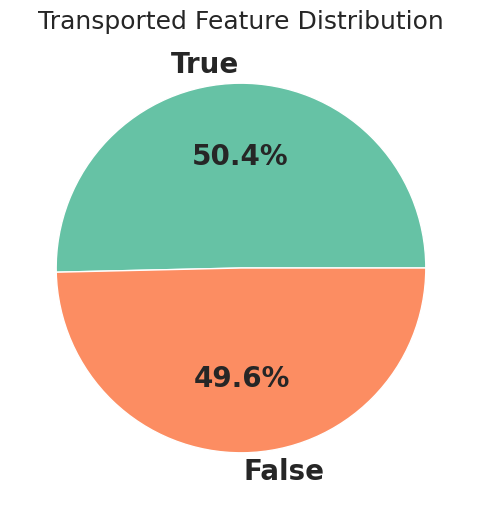

In [14]:
plt.figure(figsize=(10,6))
plt.pie(train_df["Transported"].value_counts(),labels=train_df["Transported"].value_counts().keys(),autopct="%1.1f%%",
       textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set2"))
plt.title("Transported Feature Distribution")

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">
    
<b>Observation</b><br>
💡 We can observe that our Transported Feature is highly balanced.<br>
💡 So we don't have to use techniques like under_sampling or over_sampling<br>
</div>

### 2.Visualizing AGE Feature

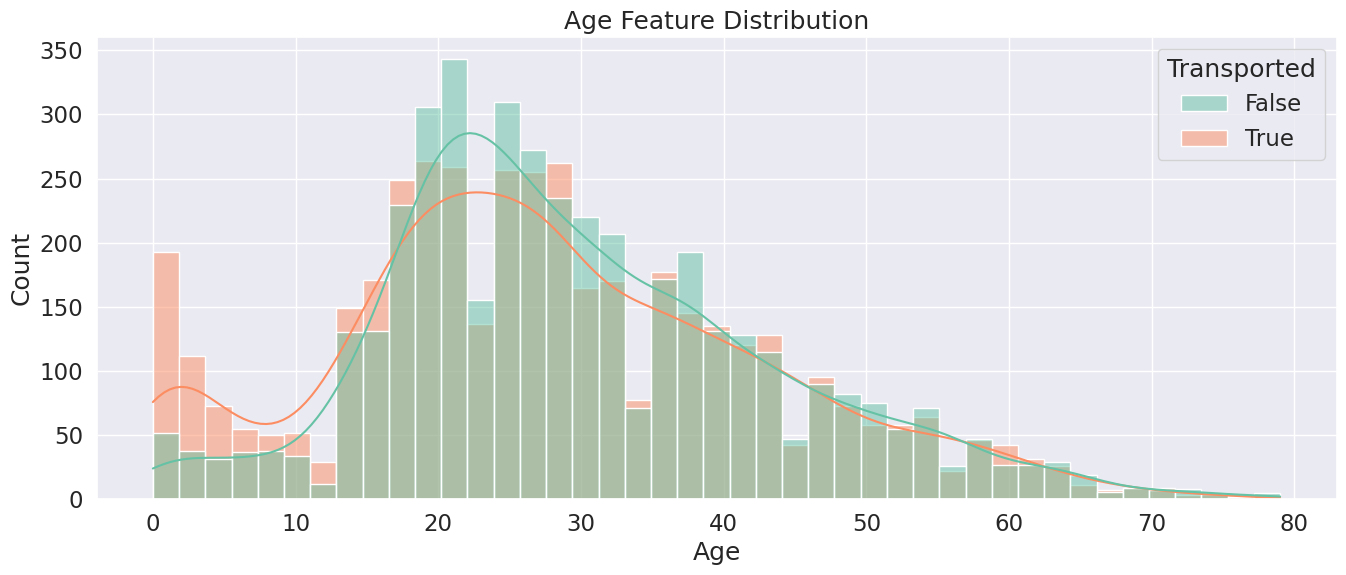

In [15]:
plt.figure(figsize=(16,6))
sns.histplot(x=train_df["Age"],hue="Transported",data=train_df,kde=True,palette="Set2")
plt.title("Age Feature Distribution");

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 Most of the passengers were between age 18-32.<br>
💡 Age from 0-18 passengers are highly transported when compared with not transported passengers espically for those who were new born.<br>
💡 Age from 18-32 passengers are comparatively less transported when compared to not transported passengers. <br>
💡 Age above 32 seems to be equally transported when compared to not transported passengers.<br>

<b>Insights</b><br>
💡 We can create a new feature Age-Catgeory from age in which we can split ages into different categories.<br>
</div>

### 3. Visualizing All Expenditure Features ("RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck")

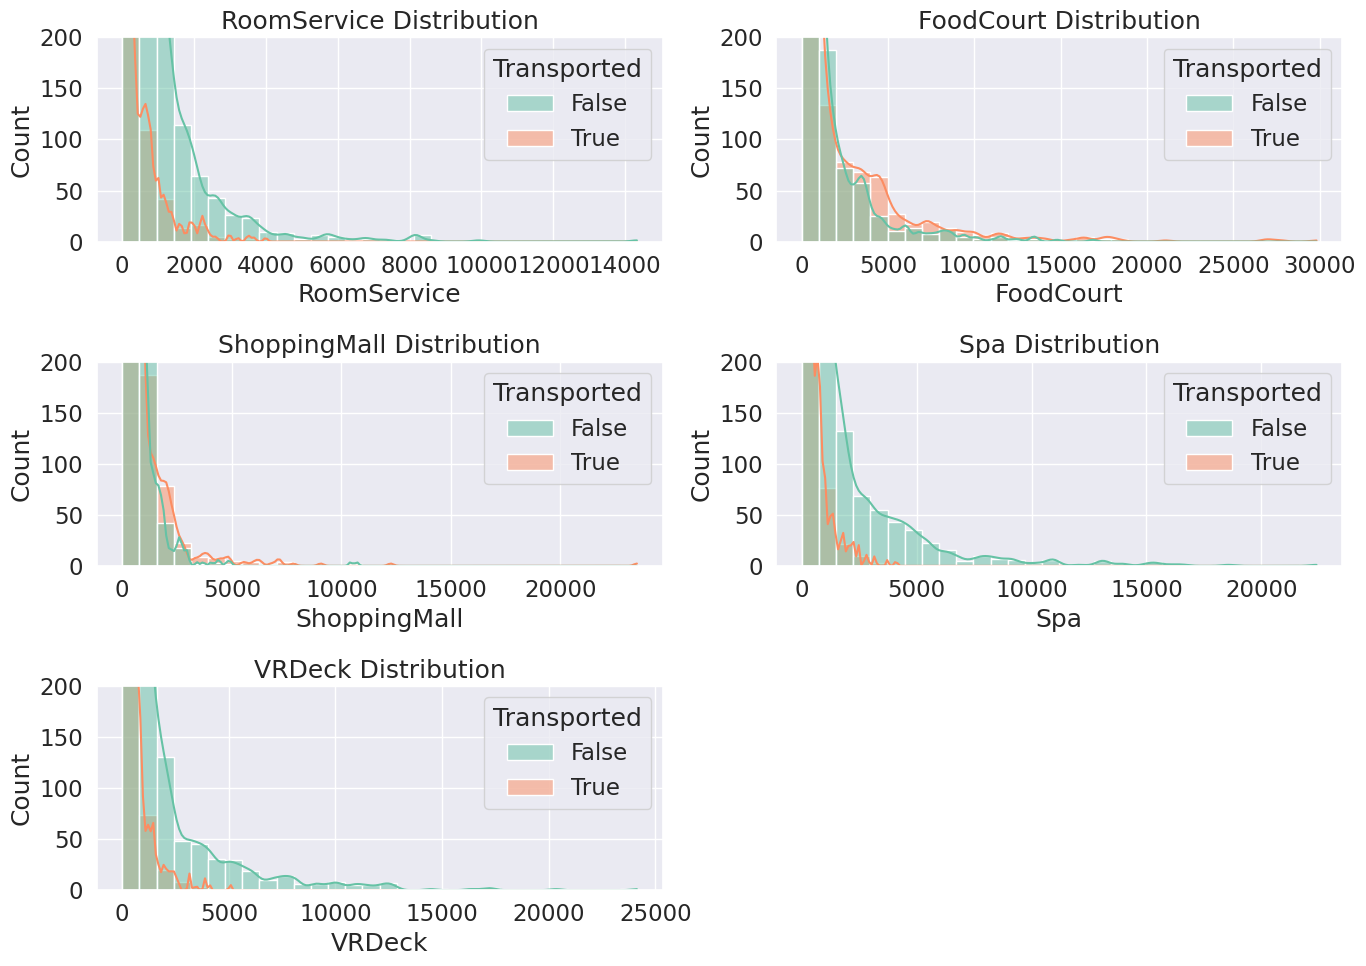

In [18]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=train_df,bins=30,kde=True,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.ylim(0,200)
    plt.tight_layout()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 We can observe that most of the passengers doesn't seems to expend any money.<br>
💡 Since most of the expenses are 0 so the values with higher expenses are kind of outliers in our data.<br>
💡 We can observe that RoomService,Spa & VRDeck seems to have similar distributions.<br>
💡 We can also observe that FoodCourt & ShoppingMall are having kind of similar distributions.<br>
💡 All the expenditure features distribution is Right-Skewed.<br>
💡 Passengers having less expenses are more likely to be transported than passengers having high expenses.<br>

<b>Insights</b><br>
💡 Since, all expenditure features are having right-skewed distribution. So before Model Building we will transform these features to normal distribution using log-transformation<br>

💡 We can create a new feature Total Expenditure indicating the total expenses of all different expenditures done by the passengers.<br>
💡 Since, most people expense is 0 so we can create a new boolean feature No Spending indicating whether the passenger total expense is 0 or not.<br>
💡 We can split Total Expenditure into different categories of expenditure like Low , Medium & High Expenses and create one more new feature Expenditure Category<br>
</div>


### 4. Visualizing Categorical Features ("HomePlanet", "CryoSleep", "Destination", "VIP")

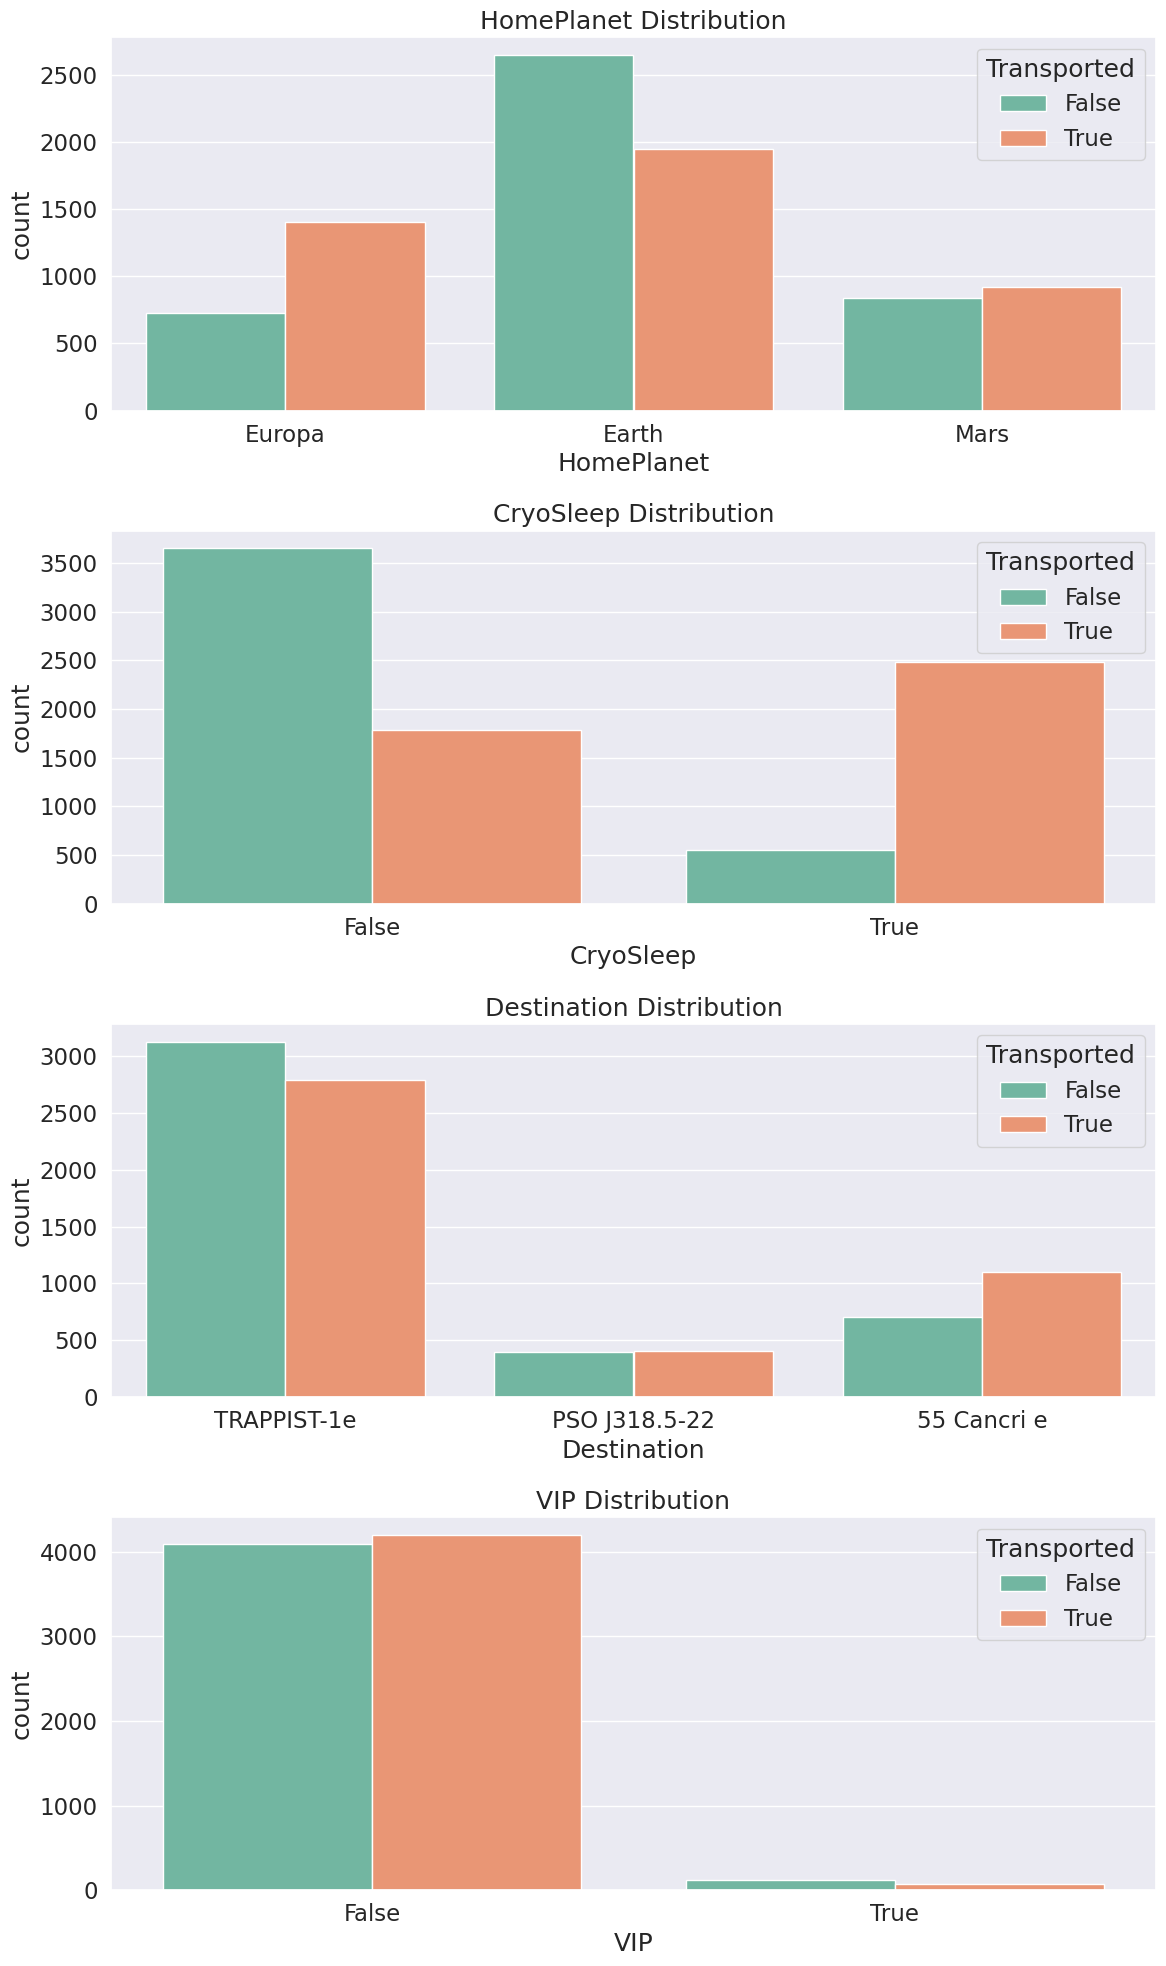

In [19]:
cat_cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(12,20))
for idx,column in enumerate(cat_cols):
    plt.subplot(4,1,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 In HomePlanet feature we can observe that most of passenger are from Earth but passenger from Earth are Comparatively Less Transported, passenger from Mars are Equally Transported, and passengers from Europa are Highly Transported.<br>
💡 In Destination feature we can observe that most of the passengers are transported to Trappist-1e.<br>
💡 In VIP feature we can observe that one cateogry is dominating other category too much. So it doesn't seem to be usefull feature because it can lead to overfitting in our model.<br>
💡 So it's better to drop VIP feature before Model building.<br>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>NOTE</b><br>
💡 We have visualized all the features expect PassengerId, Name, Cabin features. We can't visualize this features because they are having high cardinality. <br>
💡 We will visualize this feature after creating new features from this old features.<br> </div>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Feature Engineering
</p>
</div>

### 1. Creating New Feature From "PassengerId" Feature.

In [20]:
train_df["PassengerId"].head().to_frame()

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>How will we do feature engineering on PassengerId</b><br>

💡 We know that each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number of people within the group.<br>

💡 So we can create a new feature Group_Size which will indicate total number of members present in each group.<br>
💡 We can create one more new feature Travelling Solo indicating whether the passenger is travelling solo or in a group.<br>
</div>

In [21]:
def passengerid_new_features(df):
    
    #Splitting Group and Member values from "PassengerId" column.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])
    
    #Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
    x = df.groupby("Group")["Member"].count().sort_values()
    
    #Creating a set of group values which are travelling with more than 1 members.
    y = set(x[x>1].index)
    
    #Creating a new feature "Solo" which will indicate whether the person is travelling solo or not.
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)
    
    #Creating a new feature "Group_size" which will indicate each group number of members.
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]

In [22]:
passengerid_new_features(train_df)
passengerid_new_features(test_df)

**We don't require Group & Member features any more so we will drop those feature from both datasets**

In [23]:
train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

### Visualizing "Group_Size" & "Travelling_Solo" Features.

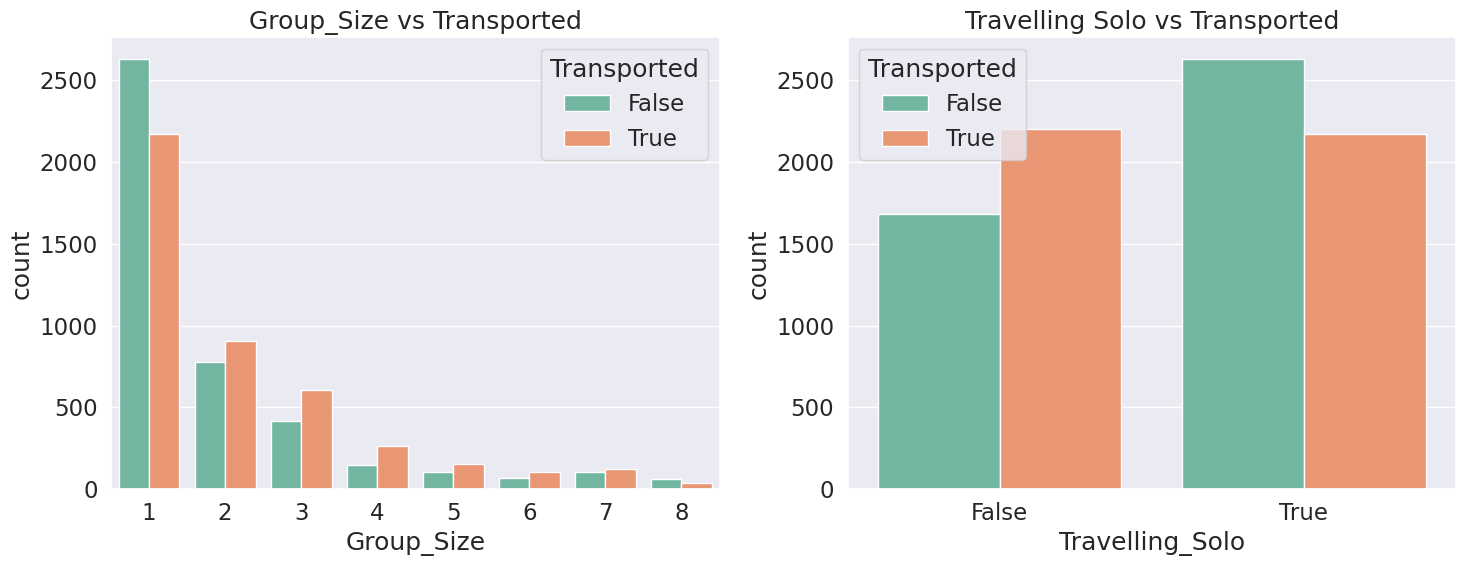

In [24]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="Group_Size", hue="Transported", data=train_df,palette="Set2")
plt.title("Group_Size vs Transported")

plt.subplot(1,2,2)
sns.countplot(x="Travelling_Solo", hue="Transported", data=train_df,palette="Set2")
plt.title("Travelling Solo vs Transported")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 From Group_Size feature we can observe that most the passengers are travelling alone.<br>
💡 From Travelling_Solo feature we can observe that passengers travelling solo are comparatively less transported when compared with passenger travelling in group.<br>
</div>

## 2. Creating New Feature using "Cabin" Feature

In [25]:
train_df["Cabin"].head().to_frame()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>How will we do feature engineering on Cabin</b><br>

💡 We know that cabin feature consists of deck/num//side , where deck is deck loacation, num is deck_number and side can be P for port or S for Starboard.<br>
💡 We can separate all these 3 values from cabin & create three new features Cabin_Deck, Cabin_Number & Cabin_Side.<br>
💡 We also know that Cabin feature is having NaN values so to avoid error while splitting we have to replace it in such a way taht we can split those NaN Values in all three new features respectively.<br>
</div>

In [26]:
def cabin_new_feature(df):
    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #In this way we can split NaN values into all three categories
    
    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
    
    #Replacing string nan values to numpy nan values..
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)
    
    #Filling Missing Values in new features created.
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(),inplace=True)

In [27]:
cabin_new_feature(train_df)
cabin_new_feature(test_df)

TypeError: Cannot convert ['0' '0' '0' ... '1500' '608' '608'] to numeric

### Visualizing "Cabin_Deck" & "Cabin_Side" Feature.

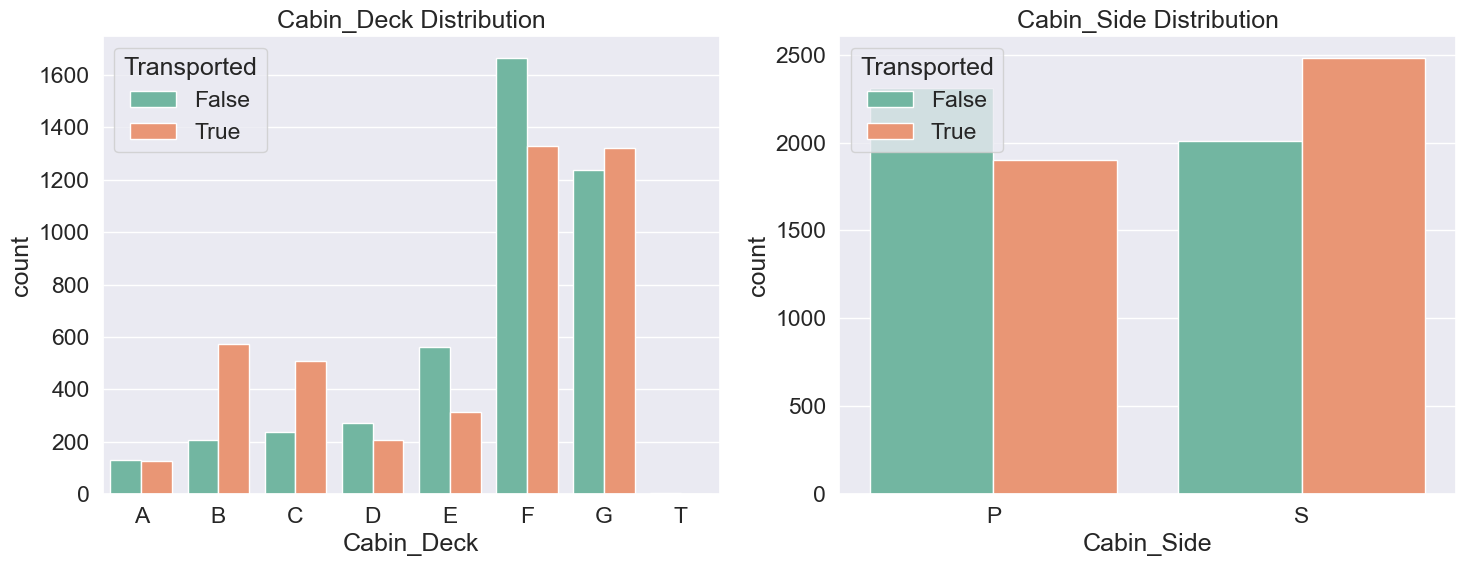

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x="Cabin_Deck",hue="Transported", data=train_df, palette="Set2",order=["A","B","C","D","E","F","G","T"])
plt.title("Cabin_Deck Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Cabin_Side", hue="Transported", data=train_df, palette="Set2")
plt.title("Cabin_Side Distribution")
plt.tight_layout()
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Insights</b><br>
💡 From Cabin_Deck we can observe that most of the people are from F & G Deck.<br>
💡 There are very few passengers in Cabin_Deck ,T.<br>
💡 Passengers from Cabin Deck B & C are very highly transported. <br>
💡 From Cabin_Side we can observe that almost half passengers were from cabin side S and half from cabin side P.<br>
💡 But passenger from cabin_side S are Highly Transported but passengers from cabin_side P are Equally Transported<br>
</div>

### Visualizing "Cabin_Number" Feature.

In [ ]:
train_df["Cabin_Number"]=train_df["Cabin_Number"].astype(int)
test_df["Cabin_Number"]=test_df["Cabin_Number"].astype(int)

**Before visualizing let's do some Statistical analysis on Cabin_Number Feature**

In [ ]:
print("Total Unique values present in Cabin_Number feature is:",train_df["Cabin_Number"].nunique())
print("The Mean of Cabin_Number Feature is: ",train_df["Cabin_Number"].mean())
print("The Median of Cabin_Number Feature is:",train_df["Cabin_Number"].median())
print("The Minimum value of Cabin_Number feature is:",train_df["Cabin_Number"].min())
print("The Maximum value of Cabin_number Feature is:",train_df["Cabin_Number"].max())

Total Unique values present in Cabin_Number feature is: 1817
The Mean of Cabin_Number Feature is:  596.3989416772115
The Median of Cabin_Number Feature is: 427.0
The Minimum value of Cabin_Number feature is: 0
The Maximum value of Cabin_number Feature is: 1894


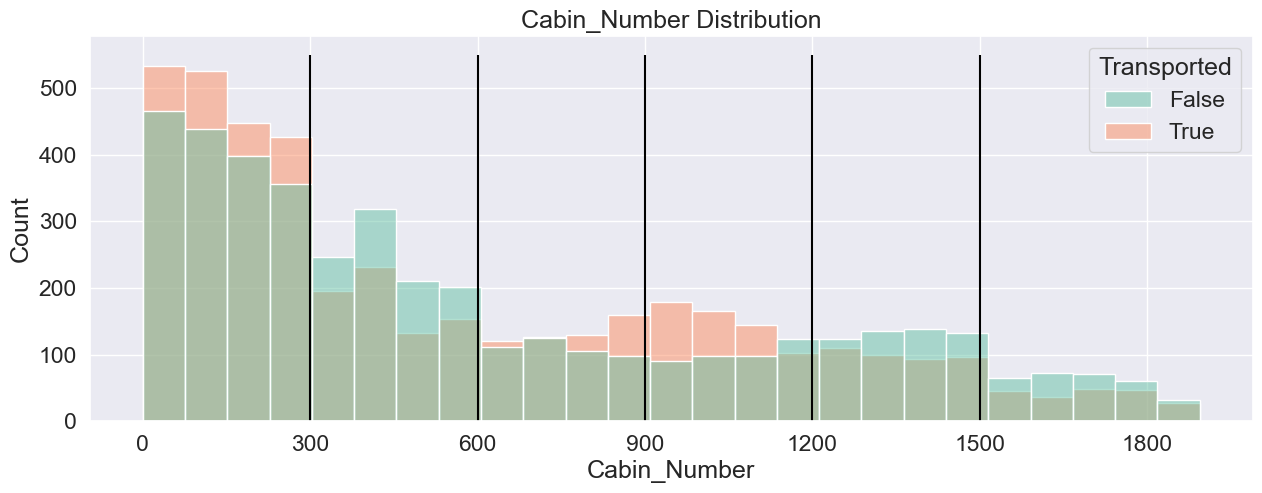

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=train_df,hue="Transported",palette="Set2")
plt.title("Cabin_Number Distribution")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color="black")
plt.vlines(600,ymin=0,ymax=550,color="black")
plt.vlines(900,ymin=0,ymax=550,color="black")
plt.vlines(1200,ymin=0,ymax=550,color="black")
plt.vlines(1500,ymin=0,ymax=550,color="black")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Insights</b><br>
💡 We can observe that Cabin_Number can be divided into different regions with group of 300 passenegrs.<br>
💡 So we can create a new features Cabin_Regions which will indicate passenger cabin number region.<br>
</div>

## 3. Creating New Feature "Cabin_Regions" From "Cabin_Number".

In [ ]:
def cabin_regions(df):
    df["Cabin_Region1"] = (df["Cabin_Number"]<300)
    df["Cabin_Region2"] = (df["Cabin_Number"]>=300) & (df["Cabin_Number"]<600)
    df["Cabin_Region3"] = (df["Cabin_Number"]>=600) & (df["Cabin_Number"]<900)
    df["Cabin_Region4"] = (df["Cabin_Number"]>=900) & (df["Cabin_Number"]<1200)
    df["Cabin_Region5"] = (df["Cabin_Number"]>=1200) & (df["Cabin_Number"]<1500)
    df["Cabin_Region6"] = (df["Cabin_Number"]>=1500)

In [ ]:
cabin_regions(train_df)
cabin_regions(test_df)

**We don't need Cabin_Number Feature anymore so we will drop this feature**

In [ ]:
train_df.drop(columns=["Cabin_Number"],inplace=True)
test_df.drop(columns=["Cabin_Number"],inplace=True)

### Visualizing "Cabin_Region" Feature.

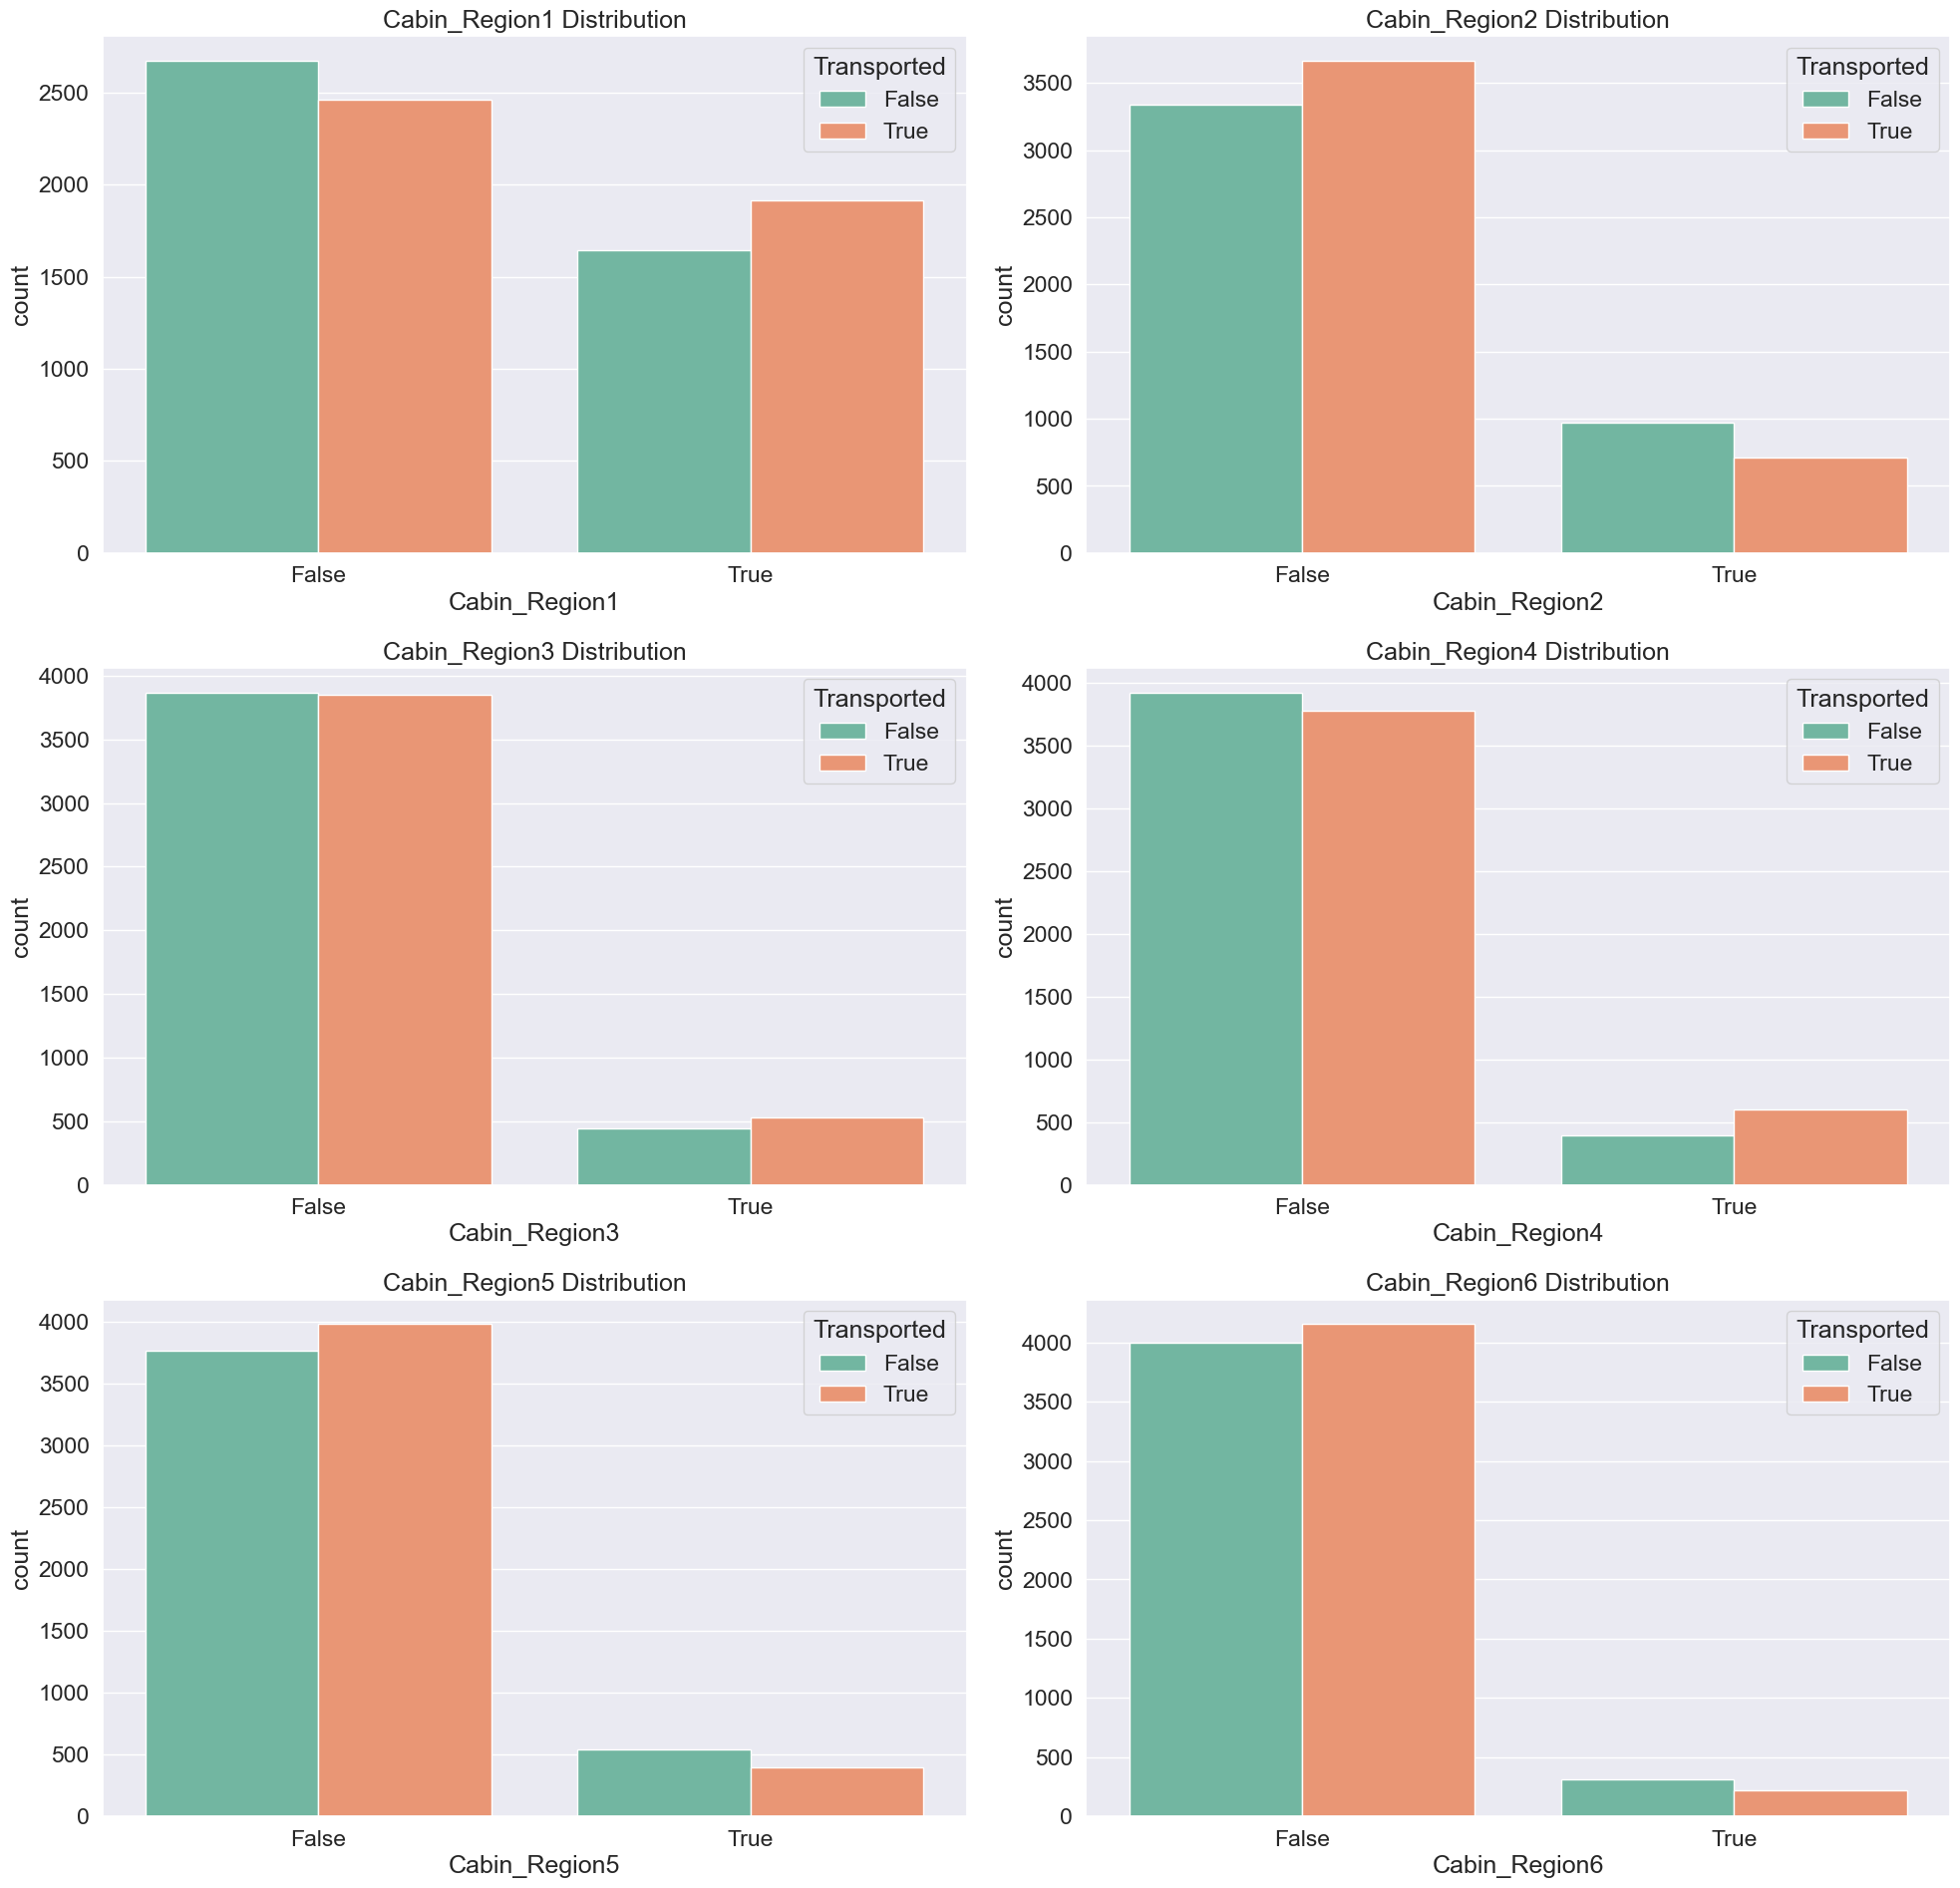

In [ ]:
cols = ["Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6"]

plt.figure(figsize=(20,25))
for idx,value in enumerate(cols):
    plt.subplot(4,2,idx+1)
    sns.countplot(x=value, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{value} Distribution")
    plt.tight_layout()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 We can observe that passengers from Cabin_Region1 are Highly Transported when compared with other cabin regions.<br>
💡 we can also observe that as the cabin region number is increasing passengers transport is decreasing.<br>
</div>

## 4. Creating New Feature From "Age"

In [ ]:
train_df["Age"].head().to_frame()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>How we will do feature engineering on Age Feature</b><br>
💡 As we have done EDA on Age feature we collected some insights over there that the ages can be splitted into different groups based on Transported.<br>
💡 So we will create a new feature name Age Group and will split the Age into different groups on the basics of insights we gainedfrom EDA.<br>
</div>

In [ ]:
def age_group(df):
    age_group  = []
    for i in df["Age"]:
        if i<=12:
            age_group.append("Age_0-12")
        elif (i>12 and i<=18):
            age_group.append("Age_13-18")
        elif (i>18 and i<=25):
            age_group.append("Age_19-25")
        elif (i>25 and i<=32):
            age_group.append("Age_26-32")
        elif (i>32 and i<=50):
            age_group.append("Age_33_50")
        elif (i>50):
            age_group.append("age_50+")
        else:
            age_group.append(np.nan)
        
    df["Age Group"] = age_group

In [ ]:
age_group(train_df)
age_group(test_df)

### Visualizing "Age Group" Feature.

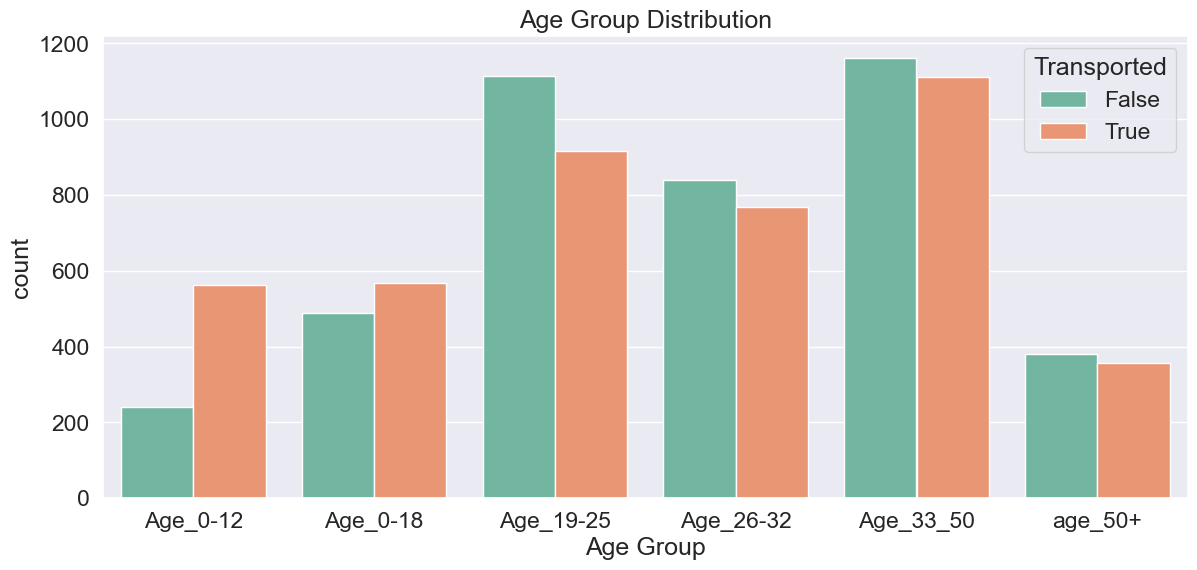

In [ ]:
order = sorted(train_df["Age Group"].value_counts().keys().to_list())

plt.figure(figsize=(14,6))
sns.countplot(x="Age Group",hue="Transported", data=train_df, palette="Set2",order=order)
plt.title("Age Group Distribution");

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Insights</b><br>
💡 This new feature looks more relevent to our target data.<br>
💡 Age_0-12 & Age_0-18 are more likely to be transported compared to not transported.<br>
💡 Age_19-25 , Age_26_32 & Age_33_50 are less likely to be transported compared to not transported.<br>
💡 Age_50+ are almost equally transported compared to not transported.<br>
</div>

## 5. Creating New Features Using All Expenditude Features.

In [ ]:
train_df[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>How can we do feature engineering on all expenditure featrues</b><br>

💡 When we have done EDA on this expenditure features we gained some insights as:-<br>
  1. We can create a Total Expenditure Feature by combining all the expenditures.<br>
  2. We can create a No Spending boolean feature from Total Expenditure feature indicating True for those passengers who have spent 0 expense.<br>
  3. We can split Total Expenditure into different categories indicating whether the person is having no_expense, low_expense, medium_expense or high_expense and can create a new feature Expenditure Category.<br>
</div>

In [ ]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def new_exp_features(df):
    df["Total Expenditure"] = df[exp_cols].sum(axis=1)
    df["No Spending"] = (df["Total Expenditure"]==0)

In [ ]:
new_exp_features(train_df)
new_exp_features(test_df)

### Visualizing "Total Expenditure" Feature.

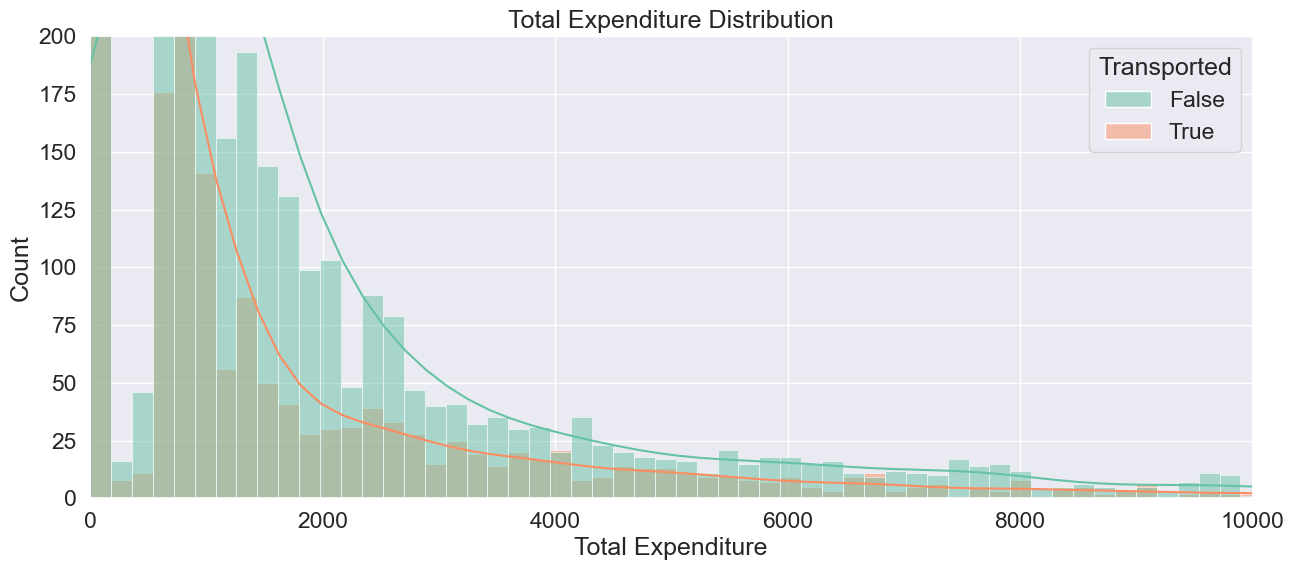

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(x="Total Expenditure", hue="Transported", data=train_df, kde=True, palette="Set2",bins=200)
plt.ylim(0,200)
plt.xlim(0,10000)
plt.title("Total Expenditure Distribution");

**Generating some statistical information from Total Expenditue feature**

In [ ]:
mean = round(train_df["Total Expenditure"].mean())
median = train_df["Total Expenditure"].median()

print("Mean value of Total Expenditure feature is = ",mean)
print("Median value of Total Expenditure feature is = ",median)

Mean value of Total Expenditure feature is =  1441
Median value of Total Expenditure feature is =  716.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Insights</b><br>
💡 Using above measure of central tendency values we can split Total Expenditure Features into different expense categories.<br>
💡 If Total Expenditure is equal to 0 then No Expense category.<br>
💡 If Total Expenditure is between 1-716 then Low Expense category.<br>
💡 If Total Expenditure is between 717-1441 then Medium Expense category.<br>
💡 If Total Expenditure is greater thean 1441 then High Expense category.<br>
</div>

In [ ]:
def expenditure_category(df):
    expense_category = []
    
    for i in df["Total Expenditure"]:
        if i==0:
            expense_category.append("No Expense")
        elif (i>0 and i<=716):
            expense_category.append("Low Expense")
        elif (i>716 and i<=1441):
            expense_category.append("Medium Expense")
        elif (i>1441):
            expense_category.append("High Expense")
    
    df["Expenditure Category"] = expense_category

In [ ]:
expenditure_category(train_df)
expenditure_category(test_df)

### Visualizing "No Spending" & "Expenditure Category" Features.

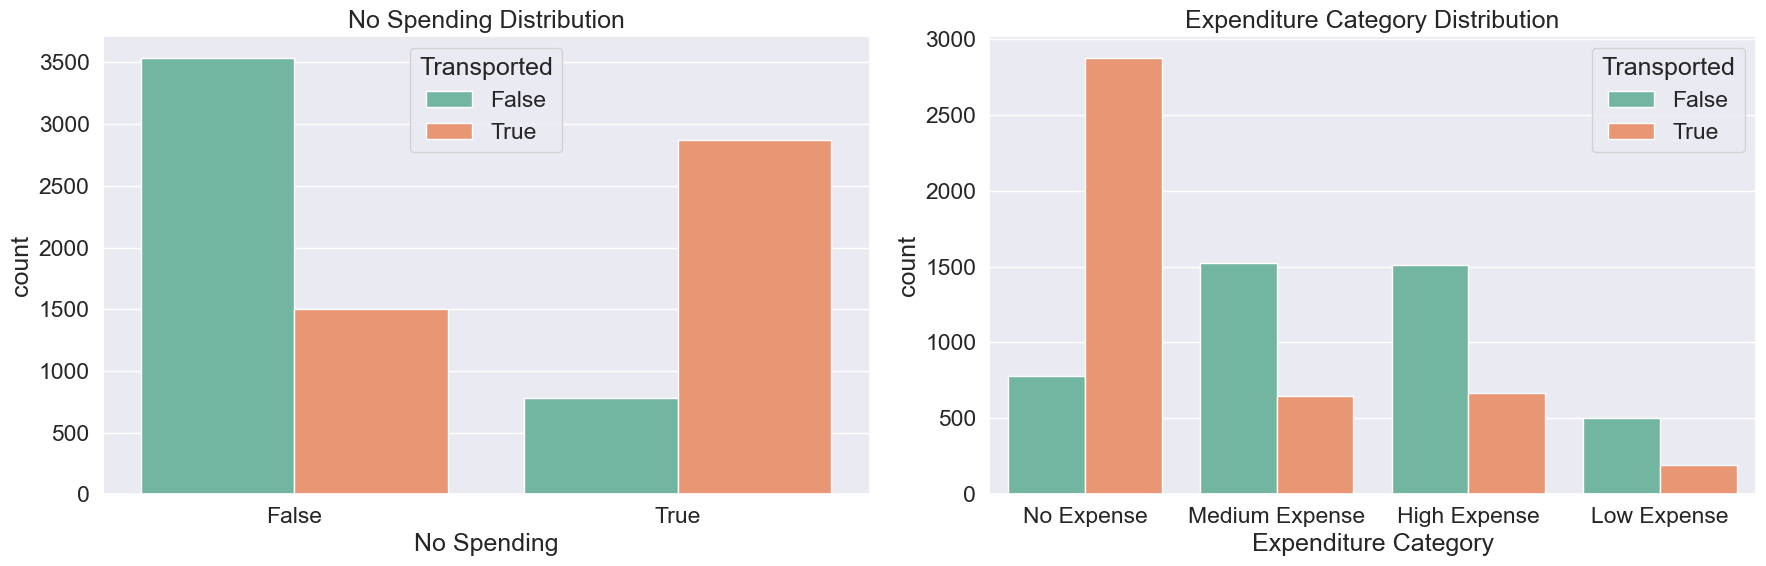

In [ ]:
cols = ["No Spending", "Expenditure Category"]

plt.figure(figsize=(18,6))
for idx,column in enumerate(cols):
    plt.subplot(1,2,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
    
💡 In Total Expenditure feature we can observe that passengers having low total expenses are likely to be transported more.<br>
💡 In No Spending feature we can observe that passenger having No Spending are highly transported.<br>
💡 in Expenditure Category feature we can confirm than passenger having No Expense are highly transported .<br>
</div>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Pre-Processing
</p>
</div>

### 1. Checking Missing Values.

In [ ]:
z = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:"No. of Missing values"})
z["% of Missing values"] = round(train_df.isnull().sum()[train_df.isnull().sum()>0]*100/len(train_df),2)
z

,No. of Missing values,% of Missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


### 2. Visualizing Missing Numbers

In [ ]:
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

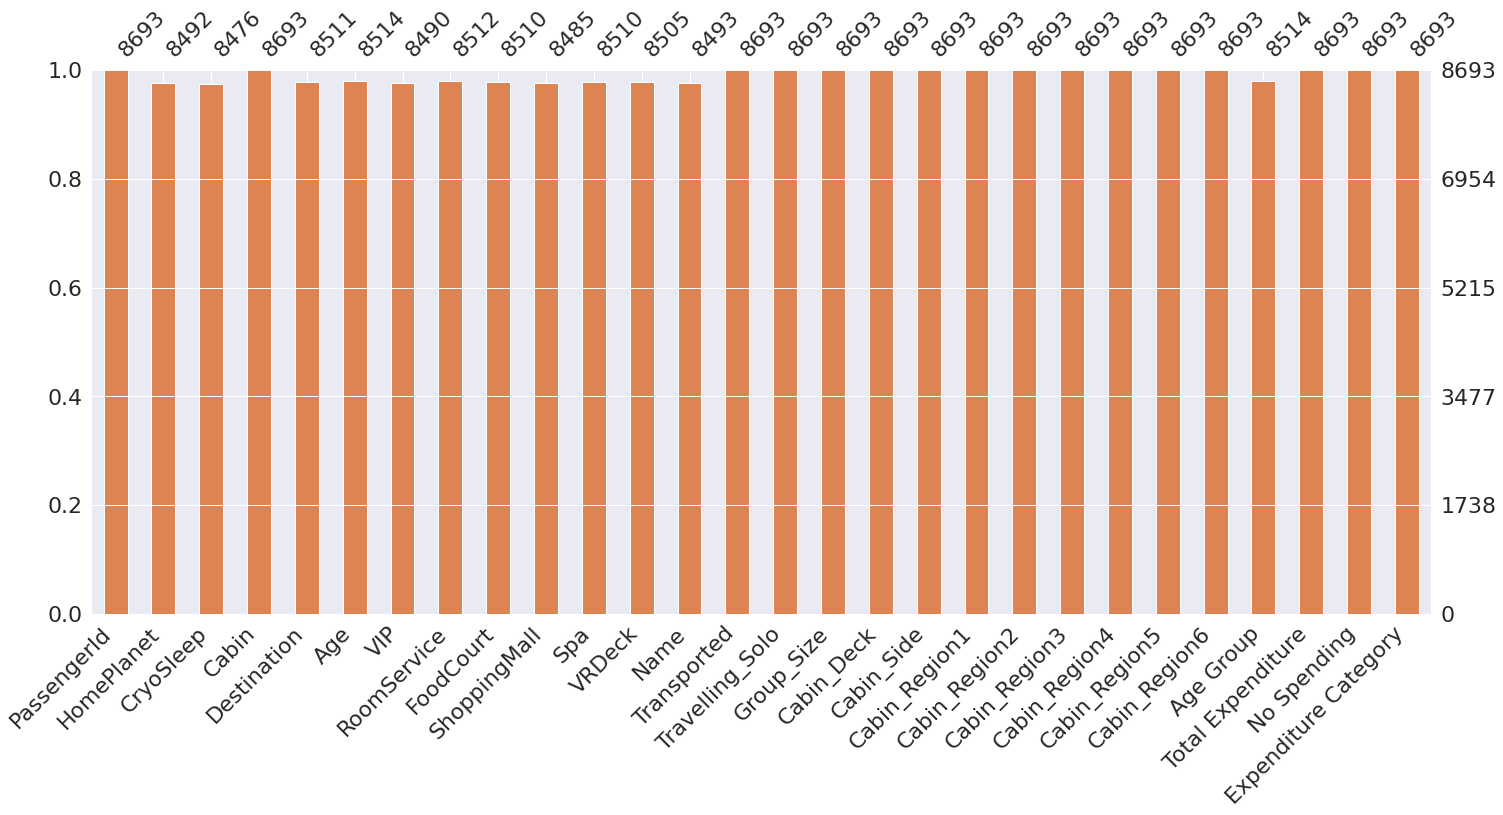

In [ ]:
msno.bar(train_df,color="C1",fontsize=22)
plt.show()

**Another way to visualize missing Values**

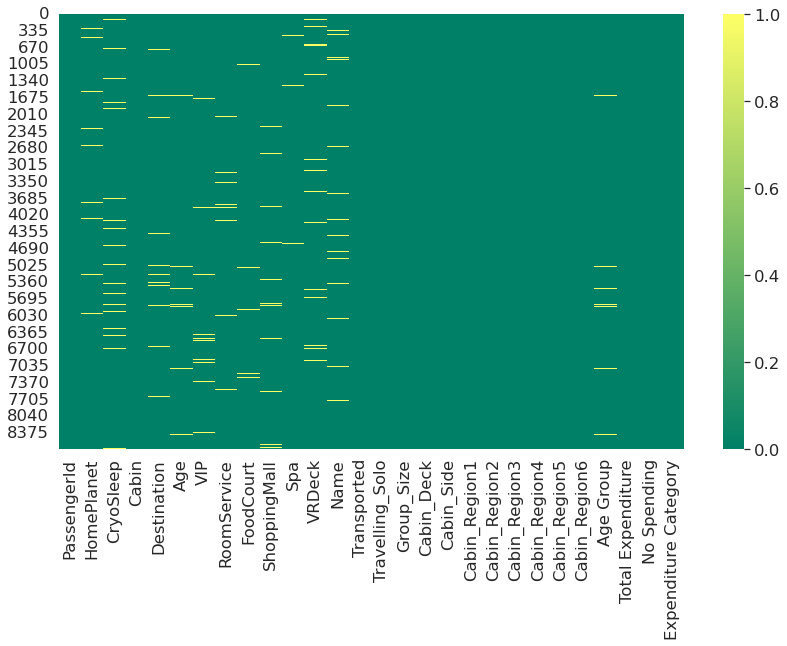

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(train_df.isnull(),cmap="summer")
plt.show()

### 4. Handling Missing Values.

In [ ]:
cat_cols = train_df.select_dtypes(include=["object","bool"]).columns.tolist()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include=["int","float"]).columns.tolist()

In [ ]:
print("Categorical Columns:",cat_cols)
print("\n","-"*120)
print("\nNumerical Columns:",num_cols)

Categorical Columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Travelling_Solo', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6', 'Age Group', 'No Spending', 'Expenditure Category']

 ------------------------------------------------------------------------------------------------------------------------

Numerical Columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_Size', 'Total Expenditure']


**Using Simple Imputer Library to Fill Missing Values**

In [ ]:
imputer1 = SimpleImputer(strategy="most_frequent")     ##To fill Categorical Features.
imputer2 = SimpleImputer(strategy="median")            ##To fill numeircal features.

In [ ]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [ ]:
fill_missingno(train_df)
fill_missingno(test_df)

In [ ]:
print("Missing numbers left in train_df is:",train_df.isnull().sum().sum())
print("Missing numbers left in test_df is:",test_df.isnull().sum().sum())

Missing numbers left in train_df is: 0
Missing numbers left in test_df is: 0


### 5. Checking Duplicacy in Data.

In [ ]:
print("Duplicate values in training data is: ",train_df.duplicated().sum())
print("Duplicate values in testing data is: ",test_df.duplicated().sum())

Duplicate values in training data is:  0
Duplicate values in testing data is:  0


### 6. Checking Cardinality of Categorical Features.

In [ ]:
print("Cardinality of features in numerical data is: ")
print(train_df.select_dtypes(include=["object"]).nunique())
print("\n","-"*50)
print("\nCardinality of features in categorical data is: ")
print(test_df.select_dtypes(include=["object"]).nunique())

Cardinality of features in numerical data is: 
PassengerId             8693
HomePlanet                 3
CryoSleep                  2
Cabin                   6561
Destination                3
VIP                        2
Name                    8473
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side                 2
Cabin_Region1              2
Cabin_Region2              2
Cabin_Region3              2
Cabin_Region4              2
Cabin_Region5              2
Cabin_Region6              2
Age Group                  6
No Spending                2
Expenditure Category       4
dtype: int64

 --------------------------------------------------

Cardinality of features in categorical data is: 
PassengerId             4277
HomePlanet                 3
CryoSleep                  2
Cabin                   3266
Destination                3
VIP                        2
Name                    4176
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side               

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 We have done all feature engineering now we can drop features which have high cardinality.<br>
💡 So we can drop passengerId, Cabin , Name , Group and Surname features.<br>
</div>

**Dropping Categorical Features with High Cardinality**

In [ ]:
##Extracting passengerId from test data because qe need this for submitting our predictions on kaggle.
pass_df = test_df[["PassengerId"]]

In [ ]:
cols = ["PassengerId","Cabin","Name"]
train_df.drop(columns =cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

### 7. Gathering Statistical Information of Numerical Features.

In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group_Size,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Total Expenditure,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Obervation</b><br>
💡 We can oberve in RoomService, FoodCourt, ShoppingMall, Spa & VRDeck more than 50 percentile of data are equal to 0.<br>
💡 And when we did EDA on this features all of them were having right skewed distribution<br>
💡 So we can simply say there is a presence of large amount of outliers in these features.<br>
💡 So we can tranform these features to normal distribution using Log Transformation.<br>
💡 Since, we are applying log transformation on these expenditure features so we have to apply transformation on Total Expenditure also.<br>
💡 So that the model can have better understanding while finding patterns.<br>
</div>

## 8. Applying Log Transformation on Expenditure Features.

In [ ]:
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total Expenditure']

for value in cols:
    train_df[value] = np.log(1+train_df[value])
    test_df[value]=np.log(1+test_df[value])

### Visualizing these features after Transformation

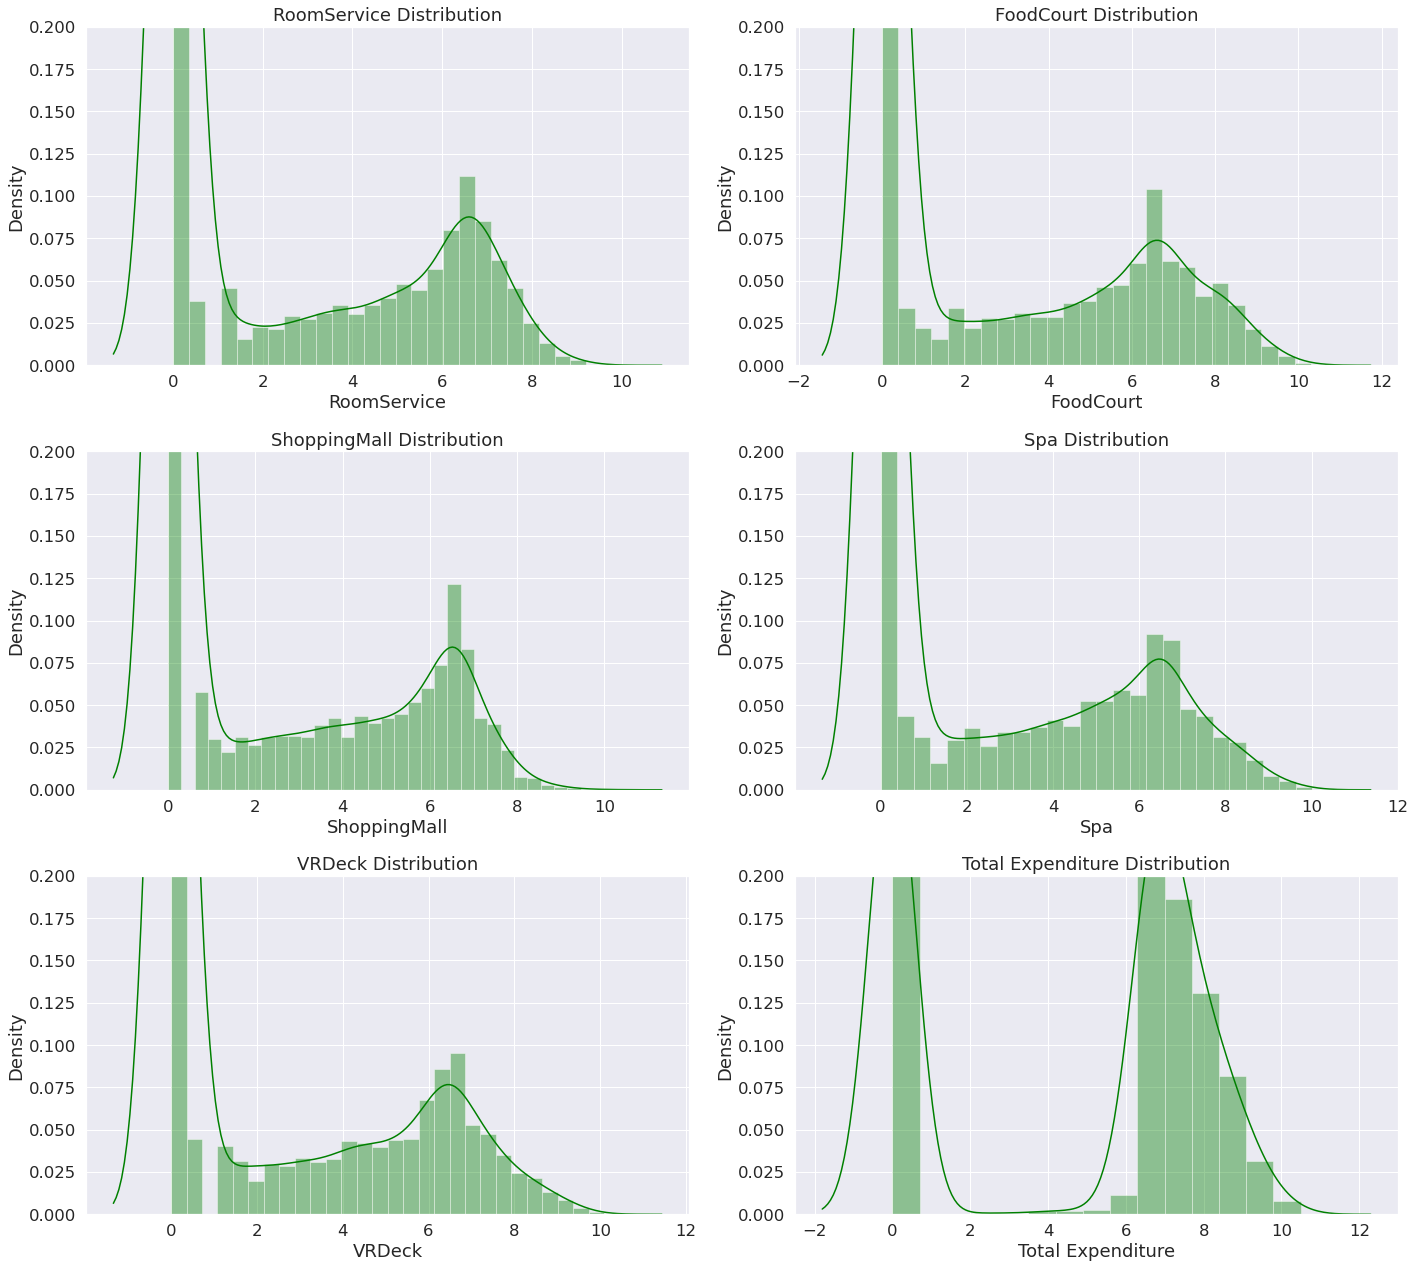

In [ ]:
x=1

plt.figure(figsize=(20,35))
for i in cols:
    plt.subplot(6,2,x)
    sns.distplot(train_df[i],color="green")
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x+=1

### 9. Checking Data - Types of Features.

In [ ]:
train_df.dtypes

HomePlanet               object
CryoSleep                object
Destination              object
Age                     float64
VIP                      object
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Transported                bool
Travelling_Solo          object
Group_Size              float64
Cabin_Deck               object
Cabin_Side               object
Cabin_Region1            object
Cabin_Region2            object
Cabin_Region3            object
Cabin_Region4            object
Cabin_Region5            object
Cabin_Region6            object
Age Group                object
Total Expenditure       float64
No Spending              object
Expenditure Category     object
dtype: object

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Note</b><br>
💡 CryoSleep , VIP, Travelling_Solo, No Spending, Cabin_Region1, Cabin_Region2, Cabin_Region3, Cabin_Region4, Cabin_Region5, Cabin_Region6 features contains boolean values so we have to change there data-type which will be benefical while encoding our categorical features.<br>
</div>

**Changing Data-Type to Boolean**

In [ ]:
cols = ["CryoSleep","VIP","Travelling_Solo","No Spending","Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4",
       "Cabin_Region5","Cabin_Region6"]

train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

### 7. Feature Encoding

* We will do **One Hot Encoding** for nominal categorical features.
* We will do **LabelEncoding** for ordinal categorical features.

In [ ]:
nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_Solo","Cabin_Deck","Cabin_Side","Cabin_Region1","Cabin_Region2",
                    "Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6","Age Group","No Spending",
                    "Expenditure Category"]

**Label Encoding**

In [ ]:
enc = LabelEncoder()

In [ ]:
train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

**One Hot Encoding**

In [ ]:
train_df = pd.get_dummies(train_df,columns=nominal_cat_cols)
test_df = pd.get_dummies(test_df,columns=nominal_cat_cols)


**Note**
* We still have one feature **Transported** left for encoding in training dataset.

In [ ]:
train_df["Transported"].replace({False:0,True:1},inplace=True)

**Checking all features are encoded or not**

In [ ]:
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,1.0,1,0,1,0,0,0,0,0,4,0.000000,1,3,0,1,0,0,0,1
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,1,1.0,5,1,1,0,0,0,0,0,2,6.602588,0,2,1,0,0,0,0,1
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,0,2.0,0,1,1,0,0,0,0,0,5,9.248021,0,0,0,1,0,0,0,1
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,0,2.0,0,1,1,0,0,0,0,0,4,8.551981,0,0,0,1,0,0,0,1
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,1,1.0,5,1,1,0,0,0,0,0,1,6.995766,0,2,1,0,0,0,0,1


In [ ]:
test_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,0,0.000000,0.000000,0.000000,0.000000,0.00000,1,1.0,6,1,1,0,0,0,0,0,3,0.000000,1,3,1,0,0,0,0,1
1,0,19.0,0,0.000000,2.302585,0.000000,7.945910,0.00000,1,1.0,5,1,1,0,0,0,0,0,2,7.949091,0,0,1,0,0,0,0,1
2,1,31.0,0,0.000000,0.000000,0.000000,0.000000,0.00000,1,1.0,2,1,1,0,0,0,0,0,3,0.000000,1,3,0,1,0,1,0,0
3,0,38.0,0,0.000000,8.802823,0.000000,5.204007,6.37332,1,1.0,2,1,1,0,0,0,0,0,4,8.911800,0,0,0,1,0,0,0,1
4,0,20.0,0,2.397895,0.000000,6.455199,0.000000,0.00000,1,1.0,5,1,1,0,0,0,0,0,2,6.470800,0,1,1,0,0,0,0,1


### 8. Selecting Features & Labels For Model Training.

In [ ]:
X = train_df.drop(columns=["Transported"])
y = train_df[["Transported"]]

### 9. Feature Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(test_df)

### 10. Splitting Data For Model Which Don't Need Scaled Data.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape, y_train.shape)

(6954, 28) (6954, 1)


In [ ]:
print(x_test.shape,y_test.shape)

(1739, 28) (1739, 1)


### 11. Splitting Data For Model Which Need Scaled Data.

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train1.shape, y_train1.shape)

(6954, 28) (6954, 1)


In [ ]:
print(x_test1.shape, y_test1.shape)

(1739, 28) (1739, 1)


---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Building For Scaled Data
</p>
</div>

In [ ]:
training_score = []
testing_score = []

In [ ]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1. Logistic-Regression </b> Model</h2>

Accuracy_Score of LogisticRegression() model on Training Data is: 77.8688524590164
Accuracy_Score of LogisticRegression() model on Testing Data is: 77.17078780908568

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7578040904198062
Recall Score of LogisticRegression() model is: 0.8036529680365296
F1 Score of LogisticRegression() model is: 0.7800554016620498

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


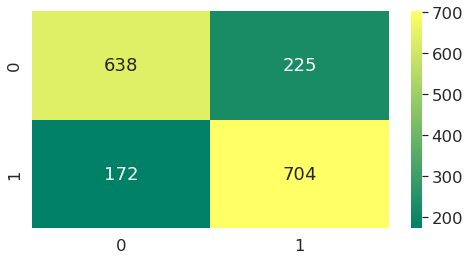

In [ ]:
model_prediction(LogisticRegression())

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>2. KNeighborsClassifier </b> Model</h2>

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 83.14639056658038
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 75.50316273720529

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.7697841726618705
Recall Score of KNeighborsClassifier() model is: 0.7328767123287672
F1 Score of KNeighborsClassifier() model is: 0.7508771929824561

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


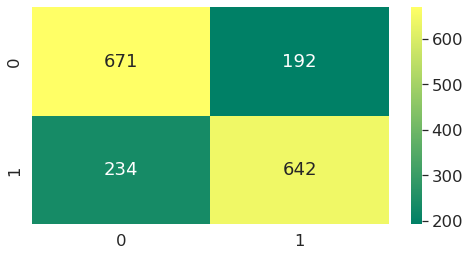

In [ ]:
model_prediction(KNeighborsClassifier())

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>3. Support-Vector-Classifier </b> Model</h2>

Accuracy_Score of SVC() model on Training Data is: 81.8234109864826
Accuracy_Score of SVC() model on Testing Data is: 79.700977573318

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.7995418098510882
Recall Score of SVC() model is: 0.7968036529680366
F1 Score of SVC() model is: 0.7981703830760436

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


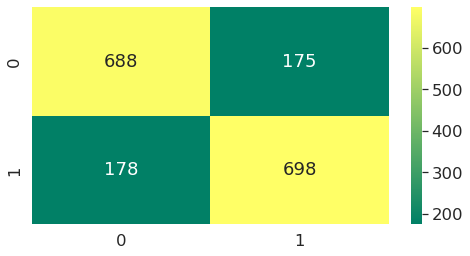

In [ ]:
model_prediction(SVC())

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>4. Naive-Bayes </b> Model</h2>

Accuracy_Score of GaussianNB() model on Training Data is: 73.94305435720449
Accuracy_Score of GaussianNB() model on Testing Data is: 73.3755031627372

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.7779273216689099
Recall Score of GaussianNB() model is: 0.6598173515981736
F1 Score of GaussianNB() model is: 0.7140210006176654

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


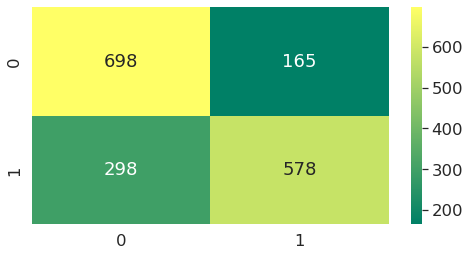

In [ ]:
model_prediction(GaussianNB())

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Building For Un-Scaled Data
</p>
</div>

In [ ]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>5. Decision-Tree-Classifier </b> Model</h2>

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 98.53321829163072
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 74.58309373202991

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.7432735426008968
Recall Score of DecisionTreeClassifier() model is: 0.7568493150684932
F1 Score of DecisionTreeClassifier() model is: 0.75

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


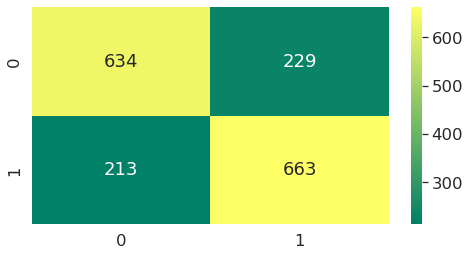

In [ ]:
model_prediction(DecisionTreeClassifier())

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>6. Random-Forest-Classifier </b> Model</h2>

Accuracy_Score of RandomForestClassifier() model on Training Data is: 98.53321829163072
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 80.39102932719953

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.830655129789864
Recall Score of RandomForestClassifier() model is: 0.7671232876712328
F1 Score of RandomForestClassifier() model is: 0.797626112759644

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


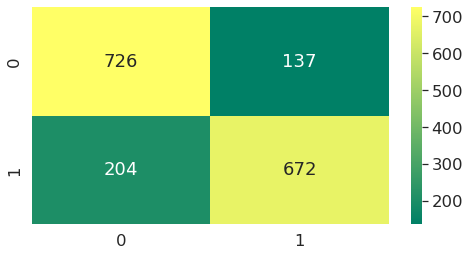

In [ ]:
model_prediction(RandomForestClassifier())

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>7. Ada-Boost-Classifier </b> Model</h2>

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 79.98274374460742
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 79.24094307073031

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.7657378740970072
Recall Score of AdaBoostClassifier() model is: 0.8470319634703196
F1 Score of AdaBoostClassifier() model is: 0.8043360433604336

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


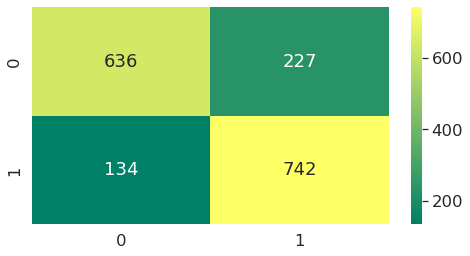

In [ ]:
model_prediction(AdaBoostClassifier())

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>8. Gradient-Boosting-Classifier </b> Model</h2>

In [1]:
model_prediction(GradientBoostingClassifier())

NameError: name 'model_prediction' is not defined

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>9. LGMB Classifier </b> Model</h2>

Accuracy_Score of LGBMClassifier() model on Training Data is: 88.35202761000863
Accuracy_Score of LGBMClassifier() model on Testing Data is: 81.48361127084532

------------------------------------------------------------------------
Precision Score of LGBMClassifier() model is: 0.8064159292035398
Recall Score of LGBMClassifier() model is: 0.8321917808219178
F1 Score of LGBMClassifier() model is: 0.8191011235955057

------------------------------------------------------------------------
Confusion Matrix of LGBMClassifier() model is:


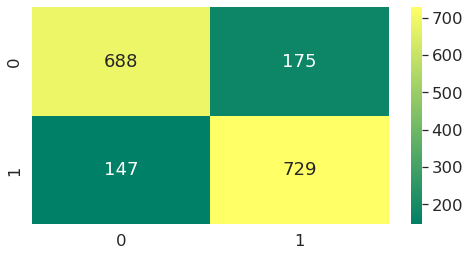

In [ ]:
model_prediction(LGBMClassifier())

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>10. XGBClassifier </b> Model</h2>

Accuracy_Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) model on Training Data is: 92.78113316077078
Accuracy_Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
             

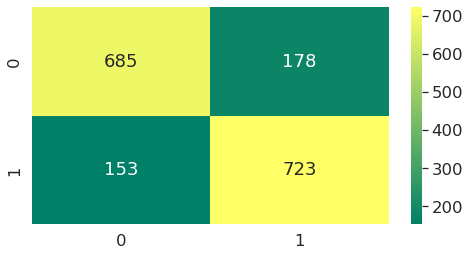

In [ ]:
model_prediction(XGBClassifier())

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>11. Cat-Boost-Classifier </b> Model</h2>

Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x7f32f8699bd0> model on Training Data is: 87.331032499281
Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x7f32f8699bd0> model on Testing Data is: 81.36860264519838

------------------------------------------------------------------------
Precision Score of <catboost.core.CatBoostClassifier object at 0x7f32f8699bd0> model is: 0.8032967032967033
Recall Score of <catboost.core.CatBoostClassifier object at 0x7f32f8699bd0> model is: 0.8344748858447488
F1 Score of <catboost.core.CatBoostClassifier object at 0x7f32f8699bd0> model is: 0.8185890257558791

------------------------------------------------------------------------
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x7f32f8699bd0> model is:


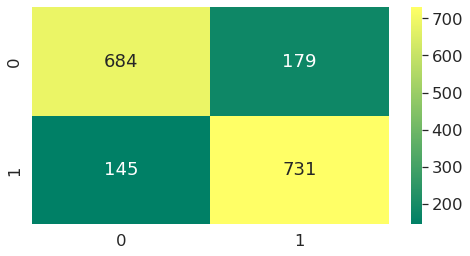

In [ ]:
model_prediction(CatBoostClassifier(verbose=False))

***

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
All Model Performance Comparison
</p>
</div>

In [ ]:
models = ["Logistic Regression","KNN","SVM","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","LGBM","XGBoost","CatBoost"]

In [ ]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [ ]:
df

,Algorithms,Training Score,Testing Score
0,Logistic Regression,77.868852,77.170788
1,KNN,83.146391,75.503163
2,SVM,81.823411,79.700978
3,Naive Bayes,73.943054,73.375503
4,Decision Tree,98.533218,74.583094
5,Random Forest,98.533218,80.391029
6,Ada Boost,79.982744,79.240943
7,Gradient Boost,82.053494,79.298447
8,LGBM,88.352028,81.483611
9,XGBoost,92.781133,80.966072


### Plotting above results using column-bar chart.

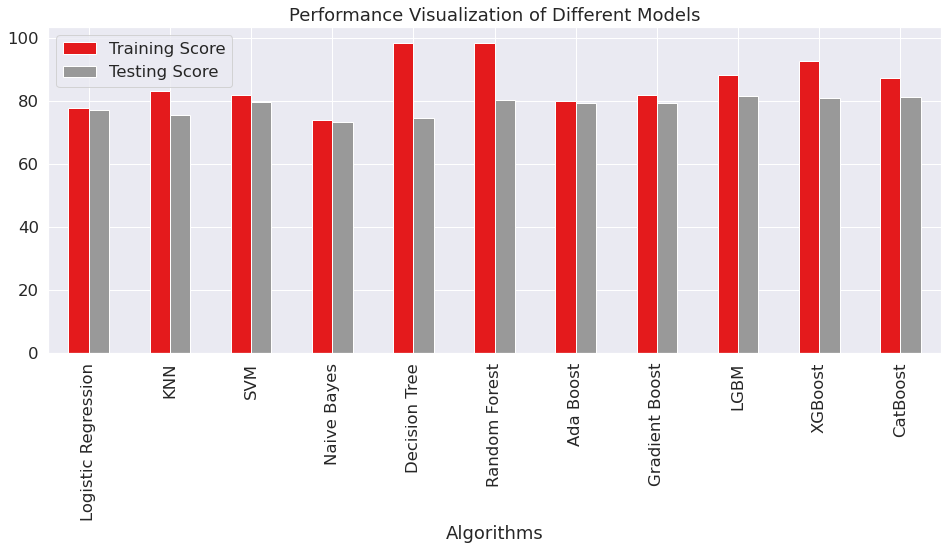

In [ ]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 Highest performance was give by LGBM near to 82%.<br>
💡 But RandomForest,XgBoost, & catBoost Model performance was also good.<br>
💡 So we will do Hyper-Parameter Tunning on these four Models.<br>
</div>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Hyper-Parameter Tunning of LGBM Model
</p>
</div>

In [ ]:
model1 = LGBMClassifier()

In [ ]:
parameters1 = {"n_estimators":[100,300,500,600,650],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}

In [ ]:
grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)

In [ ]:
grid_search1.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimators': [100, 300, 500, 600, 650],
                         'num_leaves': [16, 17, 18],
                         'random_state': [0, 42, 48, 50]})

In [ ]:
grid_search1.best_score_

0.8094625780324698

In [ ]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'learning_rate': 0.01,
 'n_estimators': 500,
 'num_leaves': 17,
 'random_state': 0}

### Creating LGBM Model Using Best Parameters.

In [ ]:
model1 = LGBMClassifier(**best_parameters1)

In [ ]:
model1.fit(x_train,y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=500, num_leaves=17,
               random_state=0)

In [ ]:
x_test_pred1 = model1.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_pred1)

0.8004600345025877

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 We can clearly observe that our LGBM Model is having best fitting.<br>
💡 Model doesn't have any overfitting or underfitting<br>
</div>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Hyper-Parameter Tunning of CatBoost Model
</p>
</div>

In [ ]:
model2 = CatBoostClassifier(verbose=False)

In [ ]:
parameters2 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
              "random_state":[0,42,48,50],
               "depth":[8,9,10],
               "iterations":[35,40,50]}

In [ ]:
grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)

In [ ]:
grid_search2.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f32f8221d50>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]})

In [ ]:
grid_search2.best_score_

0.8061551908724638

In [ ]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'depth': 8, 'iterations': 50, 'learning_rate': 0.1, 'random_state': 42}

### Creating Cat Boost Model Using Best Parameters

In [ ]:
model2 = CatBoostClassifier(**best_parameters2,verbose=False)

In [ ]:
model2.fit(x_train,y_train)

In [ ]:
x_test_pred2 = model2.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_pred2)

0.8010350776308223

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 We can clearly observe that our CatBoost Model is having best fitting.<br>
💡 Model doesn't have any overfitting or underfitting<br>
</div>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Hyper-Parameter Tunning of XGBoost Model
</p>
</div>

In [ ]:
model3 = XGBClassifier()

In [ ]:
parameters3 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [ ]:
grid_search3 = GridSearchCV(model3, parameters3 , cv=5, n_jobs=-1)

In [ ]:
grid_search3.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...ot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
          

In [ ]:
grid_search3.best_score_

0.8078796373397328

In [ ]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 0}

### Creating XGBoost Model Using Best Parameters

In [ ]:
model3 = XGBClassifier(**best_parameters3)

In [ ]:
model3.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
x_test_pred3 = model3.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_pred3)

0.8085106382978723

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>

💡 We can clearly observe that our XGBoost Model is having best fitting.<br>
💡 Model doesn't have any overfitting or underfitting<br>
</div>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Hyper Parameter Tunning of RandomForest Model
</p>
</div>

In [ ]:
model4 = RandomForestClassifier()

In [ ]:
parameters4 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}
    

In [ ]:
grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)

In [ ]:
grid_search4.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [ ]:
grid_search4.best_score_

0.8014088513517008

In [ ]:
best_parameters4 = grid_search4.best_params_
best_parameters4

{'max_depth': 12,
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 100}

### Creating Random Forest Model Using Best Parameters

In [ ]:
model4 = RandomForestClassifier(**best_parameters4)

In [ ]:
model4.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=7)

In [ ]:
x_test_pred4 = model4.predict(x_test)

In [ ]:
accuracy_score(y_test,x_test_pred4)

0.8027602070155262

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observations</b><br>

💡 We can clearly observe that Random Forest Model is having best fitting.<br>
💡 Model doesn't have any overfitting or underfitting<br>
</div>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Stacking Classifier Model
</p>
</div>

In [ ]:
stacking_model = StackingClassifier(estimators=[('LGBM', model1), 
                                                ('CAT Boost', model2),
                                                ("XGBoost", model3),
                                                ('RF', model4)])

In [ ]:
stacking_model.fit(x_train, y_train)

StackingClassifier(estimators=[('LGBM',
                                LGBMClassifier(learning_rate=0.01,
                                               n_estimators=500, num_leaves=17,
                                               random_state=0)),
                               ('CAT Boost',
                                <catboost.core.CatBoostClassifier object at 0x7f32ec51f6d0>),
                               ('XGBoost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              en...
                                              interaction_constraints='',
                         

### 

In [ ]:
x_train_pred5 = stacking_model.predict(x_train)

In [ ]:
x_test_pred5 = stacking_model.predict(x_test)

In [ ]:
print("Stacking Model accuracy on Training Data is:",accuracy_score(y_train,x_train_pred5)*100)

Stacking Model accuracy on Training Data is: 83.70721886683923


In [ ]:
print("Stacking Model accuracy on Testing Data is:",accuracy_score(y_test,x_test_pred5)*100)

Stacking Model accuracy on Testing Data is: 80.50603795284647


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Observation</b><br>
💡 We can observe that our Stacking Model is having kind of Best Fitting<br>
💡 Stacking Model is not having any kind of over_fitting or under_fitting<br>
💡 So, we can use this Stacking Model to predict our test_data and then submit it on kaggle.<br>
</div>

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Predicting Test Data
</p>
</div>

In [ ]:
pred = stacking_model.predict(test_df)

In [ ]:
pred

array([1, 0, 1, ..., 1, 1, 1])

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Submission- </b> Data Format</h2>

In [ ]:
pass_df.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [ ]:
pass_df["Transported"] = pred

In [ ]:
pass_df.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [ ]:
pass_df["Transported"].replace({1:True,0:False},inplace=True)

In [ ]:
pass_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
pass_df.shape

(4277, 2)

**Submission File**

In [ ]:
pass_df.to_csv("spaceship_prediction_project.csv",index=False)

---

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Conclusion
</p>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Titanic Spaceship Project</b><br>

💡 The main objective of this project was to predict whether the passengers will be transported to alternate dimensions or not using the independent features given.<br>

<b>Key-Points</b><br>

💡 We were havinng very few usefull independent features in the dataset. <br>
💡 So I have done various feature engineering to create some new relevant features for better predictions.<br>
💡 The main objective of feature engineering was to avoid data loss.<br>
💡 I have used different classifiers machine learning techniques for predictions.<br>
💡 Then I  have compared all the preddictions given by different classifier models.<br>
💡 Then I have selected the best performing classifier modles.<br>
💡 The best performing Models were LGBM, CatBoost, XGboost & RandomForest<br>
💡 But this models were having overfiiting.<br>
💡 So to reduce overfitting from the model I have done Hyper-Parameter Tunning<br>
💡 Then I haved used Stacking Ensemble Technique to boost my predictions.<br>
💡 In stacking Model I have used all the Models created after Hyper-Parameter Tunning.<br>
💡 In the end I have used Stacking Model to predict our test data.<br>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

<b>Thank You</b><br>
<b>If you liked this notebook then do vote for me which help my movitvation</b><br>
<b>If there's any imporvment that I can be done on this notebook just let me know in the comment section</b><br>
</div>